In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Torch tensor
Tensor is a generalization of matrix (scalar, vector, matrix, array with any dimension)

In [2]:
x = torch.tensor(2.) # create torch tensor from a scalar
print((x, x.shape))
x = np.linspace(-1,1,11)
x = torch.from_numpy(x) # Make 1-D tensor with torch tensor x from numpy array
print((x, x.shape))
x = np.ones((3,3))
x = torch.from_numpy(x) # Make matrix with torch tensor x from numpy array
print((x, x.shape))
x = torch.tensor([[[1,2],[2,1]], 
                  [[1,3],[1,1]]]) # Make 3-D tensor
print((x, x.shape))

(tensor(2.), torch.Size([]))
(tensor([-1.0000, -0.8000, -0.6000, -0.4000, -0.2000,  0.0000,  0.2000,  0.4000,
         0.6000,  0.8000,  1.0000], dtype=torch.float64), torch.Size([11]))
(tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64), torch.Size([3, 3]))
(tensor([[[1, 2],
         [2, 1]],

        [[1, 3],
         [1, 1]]]), torch.Size([2, 2, 2]))


In [3]:
# Access the element of a tensor
print(x)
print(x[1,:,1])

tensor([[[1, 2],
         [2, 1]],

        [[1, 3],
         [1, 1]]])
tensor([3, 1])


### Tensor operations and Gradient

In [4]:
# Create tensors
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad = True)
b = torch.tensor(4., requires_grad = True)
print((x,w,b))

(tensor(3.), tensor(4., requires_grad=True), tensor(4., requires_grad=True))


In [5]:
# Do arithmetic operations
y = w*x + b
print(y)

tensor(16., grad_fn=<AddBackward0>)


In [6]:
y.backward() # Calculate dy/dz where z is the variable of the right hand side which require gradient

In [7]:
# Print the partial derivative
print('dy/dx:', x.grad)
print('dy/dw:', w.grad) # x
print('dy/db:', b.grad) # 1

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [8]:
X = torch.tensor([[1.,2.]], requires_grad = True)
W = torch.tensor([[1.], [2.]], requires_grad = True)
y = X @ W # Matrix multiplication as a dot product


In [9]:
y.backward()
print(y)
print(X.grad)
print(W.grad)

tensor([[5.]], grad_fn=<MmBackward>)
tensor([[1., 2.]])
tensor([[1.],
        [2.]])


Gradient is the center of optimization that pytorch is using (gradient descent)
## Linear Regression

In [10]:
X = np.random.rand(15,3)*5.-10.
W = np.random.rand(3,2)
b = np.random.rand(1,2)
y = X.dot(W) + b
print(y)

[[ -9.81311691 -18.5271624 ]
 [-10.98969145 -20.05211175]
 [ -9.14606618 -16.61849993]
 [-10.77816658 -20.45083139]
 [ -9.06547887 -16.80165087]
 [-10.16426813 -18.30823122]
 [ -9.86121886 -18.35006749]
 [-11.24394795 -20.73336335]
 [ -9.95732581 -18.83926544]
 [ -7.50887554 -14.04143122]
 [-10.15200913 -19.14675185]
 [ -7.76334914 -14.27469688]
 [ -8.90596237 -17.028856  ]
 [ -9.80758717 -18.12075408]
 [ -9.44489437 -17.5416979 ]]


In [11]:
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [12]:
W_ = torch.tensor(np.random.rand(3,2), requires_grad=True)
b_ = torch.tensor(np.random.rand(1,2), requires_grad=True)

def model(X):
    return X@W_+b_

def loss(y1,y2): 
    dy = y1-y2
    return torch.sum(dy*dy)/dy.numel() # MSE

lr = 1e-4 # learning rate/step size
for epoch in range(100):
    preds = model(X)
    ls = loss(y, preds)
    # Gradient descent
    ls.backward() # Calculate the gradient
    with torch.no_grad(): 
        W_ += -lr*W_.grad
        b_ += -lr*b_.grad
        # Reset the gradient
        W_.grad.zero_()
        b_.grad.zero_()
    """
     torch.no_grad() is used to not keeping track or modified the gradient while updating the weight and biases
     because keeping track those gradient require some computational time or space
    """
    if (epoch+1)%20 == 0:
        print(epoch+1, ls.item())

20 30.523733731698492
40 16.01621796829058
60 8.473183075897632
80 4.550780608041257
100 2.5106436288923266


In [13]:
print(y)
print(model(X))
ls.item()

tensor([[ -9.8131, -18.5272],
        [-10.9897, -20.0521],
        [ -9.1461, -16.6185],
        [-10.7782, -20.4508],
        [ -9.0655, -16.8017],
        [-10.1643, -18.3082],
        [ -9.8612, -18.3501],
        [-11.2439, -20.7334],
        [ -9.9573, -18.8393],
        [ -7.5089, -14.0414],
        [-10.1520, -19.1468],
        [ -7.7633, -14.2747],
        [ -8.9060, -17.0289],
        [ -9.8076, -18.1208],
        [ -9.4449, -17.5417]], dtype=torch.float64)
tensor([[-10.6779, -17.2290],
        [-13.0623, -17.8170],
        [-10.5860, -14.9767],
        [-11.4022, -19.2356],
        [-11.2496, -14.6598],
        [-12.5999, -15.8934],
        [-11.0354, -16.8328],
        [-12.6438, -18.9398],
        [-10.8120, -17.5360],
        [ -8.6823, -12.7288],
        [-10.4567, -18.2033],
        [ -9.0870, -12.8346],
        [ -9.5914, -15.9341],
        [-12.0468, -15.8763],
        [-10.4277, -16.1913]], dtype=torch.float64, grad_fn=<AddBackward0>)


2.5106436288923266

In [14]:
x.sum()

tensor(3.)

## Linear regression using pytorch built-in

In [15]:
X = np.random.rand(25,3)*5.-10.
W = np.random.rand(3,2)
b = np.random.rand(1,2)
y = X.dot(W) + b
print(y)

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

[[-12.45113904  -9.05751699]
 [-13.15492089  -9.60054367]
 [-14.22357636 -10.62098673]
 [-14.72208304 -11.20438794]
 [-13.37038735 -10.11513412]
 [-11.99300343  -9.29059384]
 [-13.29069623  -9.58803233]
 [-11.69754218  -8.64987671]
 [-14.56971811 -11.09083115]
 [-11.66959504  -8.61410047]
 [-13.78350871 -10.52888819]
 [-12.80908478  -9.72105798]
 [-15.8135426  -11.55630361]
 [-11.24846827  -8.77847353]
 [-13.88392146 -10.46990163]
 [-14.13073315 -10.80451767]
 [-13.07002796  -9.73171972]
 [-10.76301442  -8.0906776 ]
 [-15.16105659 -11.19803471]
 [-13.49421406  -9.98918868]
 [-11.91519247  -9.3498255 ]
 [-14.14974331 -10.39512115]
 [-14.81350529 -11.3575038 ]
 [-13.28049958 -10.28376555]
 [-13.08133812  -9.44905192]]


#### Note
We'll create a TensorDataset, which allows access to rows from inputs and targets as tuples, and provides standard APIs for working with many different types of datasets in Pytorch.

TensorDataset allows us to access a small section/batches of the training data using array notation, it returns tuple of inputs and targets

In [16]:
from torch.utils.data import TensorDataset

In [17]:
# Define dataset
train_ds = TensorDataset(X, y)
train_ds[0:3]

(tensor([[-6.0127, -5.2243, -9.1137],
         [-8.9919, -6.6046, -5.1379],
         [-8.9444, -8.2487, -5.8085]]), tensor([[-12.4511,  -9.0575],
         [-13.1549,  -9.6005],
         [-14.2236, -10.6210]]))

#### Note
DataLoader is used to split the data into batches, and use in for-in loops

In [18]:
from torch.utils.data import DataLoader

In [19]:
# Define DataLoader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

In [20]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

print(train_dl)

tensor([[-5.2482, -8.6836, -6.9292],
        [-7.8913, -9.3104, -7.0945],
        [-5.8499, -5.9631, -7.5039],
        [-8.9810, -6.8539, -9.4173],
        [-5.5059, -9.5509, -5.8158]])
tensor([[-11.9930,  -9.2906],
        [-14.5697, -11.0908],
        [-11.6696,  -8.6141],
        [-15.8135, -11.5563],
        [-11.9152,  -9.3498]])


### torch.nn.Linear
instead of initializing weights and bias manually, we can define the model using nn.Linear class from pyTorch, which does it automatically

In [21]:
model = torch.nn.Linear(3, 2) # 3 input 2 output
print(model.weight)
print(model.bias)
print(model.parameters())
print(model)

Parameter containing:
tensor([[ 0.0943, -0.1763,  0.1296],
        [ 0.1489, -0.4982, -0.0122]], requires_grad=True)
Parameter containing:
tensor([0.3689, 0.3945], requires_grad=True)
<generator object Module.parameters at 0x000001BE0C122CC8>
Linear(in_features=3, out_features=2, bias=True)


In [22]:
 import torch.nn.functional as F

In [23]:
# Define loss function
loss_fn = F.mse_loss

### Optimizer
Optimizer is used to updating the parameter (updating, reset the gradient).
optim.SGD stands for stochastic gradient descent. It's called stochastic because samples are selected in shuffled batches instead of as a single group (common Gradient Descent).

In [24]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-3)

In [25]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        # Train with batches of data
        ls = 0
        for xb, yb in train_dl:
            pred = model(xb) # Generate Prediction
            loss = loss_fn(pred, yb) # Calculate loss
            loss.backward() # Calculate the gradient
            opt.step() # Update parameters
            opt.zero_grad() # Reset gradients to zero
            ls += loss.item()
        # Print the progress
        if (epoch+1)%10==0:
            print('Epoch [{}/{}], Loss: {:.4f}'.
                 format(epoch+1, num_epochs, ls))

In [26]:
fit(200, model, loss_fn, opt)

Epoch [10/200], Loss: 0.9186
Epoch [20/200], Loss: 0.7269
Epoch [30/200], Loss: 0.5939
Epoch [40/200], Loss: 0.4876
Epoch [50/200], Loss: 0.3864
Epoch [60/200], Loss: 0.3131
Epoch [70/200], Loss: 0.2534
Epoch [80/200], Loss: 0.2056
Epoch [90/200], Loss: 0.1653
Epoch [100/200], Loss: 0.1328
Epoch [110/200], Loss: 0.1092
Epoch [120/200], Loss: 0.0898
Epoch [130/200], Loss: 0.0719
Epoch [140/200], Loss: 0.0576
Epoch [150/200], Loss: 0.0467
Epoch [160/200], Loss: 0.0383
Epoch [170/200], Loss: 0.0314
Epoch [180/200], Loss: 0.0260
Epoch [190/200], Loss: 0.0207
Epoch [200/200], Loss: 0.0173


In [27]:
pred = model(X)
pred

tensor([[-12.4874,  -9.1572],
        [-13.0716,  -9.6857],
        [-14.1625, -10.6280],
        [-14.7496, -11.1433],
        [-13.4281, -10.0912],
        [-12.0316,  -9.2135],
        [-13.2360,  -9.7086],
        [-11.7539,  -8.7076],
        [-14.5587, -11.0299],
        [-11.6877,  -8.6758],
        [-13.7884, -10.4670],
        [-12.8461,  -9.6933],
        [-15.8017, -11.6306],
        [-11.2511,  -8.6928],
        [-13.8941, -10.4494],
        [-14.1641, -10.7354],
        [-13.0304,  -9.7576],
        [-10.7886,  -8.1118],
        [-15.0865, -11.2356],
        [-13.4605, -10.0304],
        [-11.9356,  -9.2360],
        [-14.1572, -10.4582],
        [-14.8346, -11.2689],
        [-13.2870, -10.1851],
        [-13.0655,  -9.5670]], grad_fn=<AddmmBackward>)

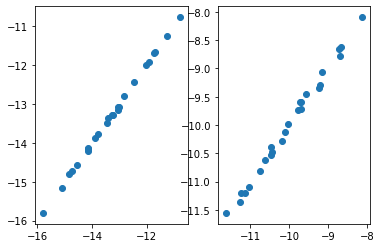

In [28]:
fig, ax = plt.subplots(ncols = 2)
ax[0].scatter(pred[:,0].detach().numpy(), y[:, 0].detach().numpy())
ax[1].scatter(pred[:,1].detach().numpy(), y[:, 1].detach().numpy())
plt.show()